<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ML_Airline_No_Differencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [5]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-11-12 07:01:25--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-11-12 07:01:25 (46.8 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [6]:
df = pd.read_csv("airline_passengers.csv",index_col = 'Month',parse_dates = True)

In [7]:
df['LogPassengers'] = np.log(df['Passengers'])

In [8]:
NTest = 12
train = df.iloc[:-NTest]
test = df.iloc[-NTest:]

In [9]:
df['LogPassengers']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: LogPassengers, Length: 144, dtype: float64

In [10]:
df['LogPassengers'].to_numpy()

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

In [11]:
#Make supervised dataset
series = df['LogPassengers'].to_numpy()

T = 10
X = []
Y = []

for t in range(len(series) - T):
  #First index is inclusive
  #Last index in exclusive
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)

In [12]:
X

[array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
        4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349]),
 array([4.77068462, 4.88280192, 4.8598124 , 4.79579055, 4.90527478,
        4.99721227, 4.99721227, 4.91265489, 4.77912349, 4.6443909 ]),
 array([4.88280192, 4.8598124 , 4.79579055, 4.90527478, 4.99721227,
        4.99721227, 4.91265489, 4.77912349, 4.6443909 , 4.77068462]),
 array([4.8598124 , 4.79579055, 4.90527478, 4.99721227, 4.99721227,
        4.91265489, 4.77912349, 4.6443909 , 4.77068462, 4.74493213]),
 array([4.79579055, 4.90527478, 4.99721227, 4.99721227, 4.91265489,
        4.77912349, 4.6443909 , 4.77068462, 4.74493213, 4.83628191]),
 array([4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
        4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989]),
 array([4.99721227, 4.99721227, 4.91265489, 4.77912349, 4.6443909 ,
        4.77068462, 4.74493213, 4.83628191, 4.94875989, 4.90527478]),
 array([4.99721227, 4.91265489, 4.

In [14]:
#Shape into 2D array
X = np.array(X).reshape(-1,T)
X

array([[4.71849887, 4.77068462, 4.88280192, ..., 4.99721227, 4.91265489,
        4.77912349],
       [4.77068462, 4.88280192, 4.8598124 , ..., 4.91265489, 4.77912349,
        4.6443909 ],
       [4.88280192, 4.8598124 , 4.79579055, ..., 4.77912349, 4.6443909 ,
        4.77068462],
       ...,
       [6.00388707, 6.03308622, 5.96870756, ..., 6.43294009, 6.40687999,
        6.23048145],
       [6.03308622, 5.96870756, 6.03787092, ..., 6.40687999, 6.23048145,
        6.13339804],
       [5.96870756, 6.03787092, 6.13339804, ..., 6.23048145, 6.13339804,
        5.96614674]])

In [16]:
Y

[4.6443908991413725,
 4.770684624465665,
 4.74493212836325,
 4.836281906951478,
 4.948759890378168,
 4.90527477843843,
 4.8283137373023015,
 5.003946305945459,
 5.135798437050262,
 5.135798437050262,
 5.062595033026967,
 4.890349128221754,
 4.736198448394496,
 4.941642422609304,
 4.976733742420574,
 5.0106352940962555,
 5.181783550292085,
 5.093750200806762,
 5.147494476813453,
 5.181783550292085,
 5.293304824724492,
 5.293304824724492,
 5.214935757608986,
 5.087596335232384,
 4.983606621708336,
 5.111987788356544,
 5.14166355650266,
 5.19295685089021,
 5.262690188904886,
 5.198497031265826,
 5.209486152841421,
 5.384495062789089,
 5.438079308923196,
 5.488937726156687,
 5.342334251964811,
 5.25227342804663,
 5.147494476813453,
 5.267858159063328,
 5.278114659230517,
 5.278114659230517,
 5.4638318050256105,
 5.459585514144159,
 5.43372200355424,
 5.493061443340548,
 5.575949103146316,
 5.605802066295998,
 5.4680601411351315,
 5.351858133476067,
 5.19295685089021,
 5.303304908059076,
 5

In [17]:
Y = np.array(Y)
Y

array([4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724866,
       5.59471138, 5.59842196, 5.75257264, 5.89715387, 5.84932478,
       5.74300319, 5.61312811, 5.46806014, 5.62762111, 5.64897

In [18]:
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (134, 10) Y.shape (134,)


In [30]:
XTrain,YTrain = X[:-NTest],Y[:-NTest]
XTest,YTest = X[-NTest:],Y[-NTest:]

In [31]:
lr = LinearRegression()
lr.fit(XTrain,YTrain)
lr.score(XTrain,YTrain)

0.9599443783339897

In [32]:
lr.score(XTest,YTest)

0.6910953044565584

In [37]:
#Boolean index
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

#First T values are not predictable
train_idx[:T] = False

In [38]:
df.loc[train_idx,'LR_1step_train'] = lr.predict(XTrain)
df.loc[test_idx,'LR_1step_test'] = lr.predict(XTest)

<Axes: xlabel='Month'>

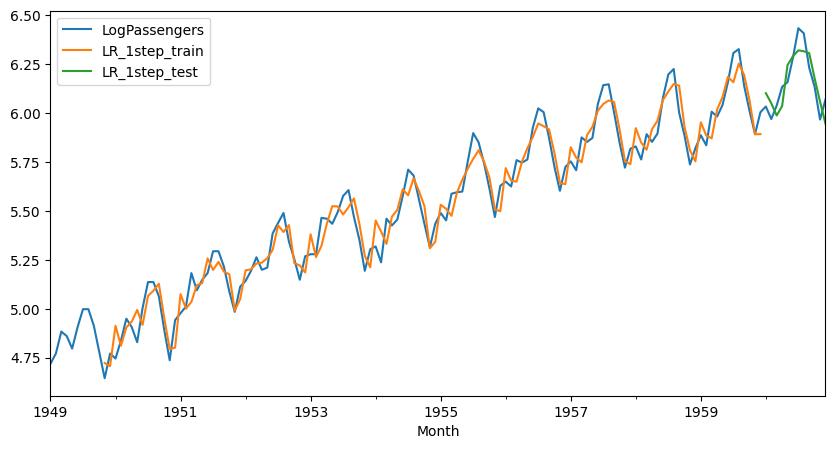

In [39]:
#plot 1-step forecast
df[['LogPassengers','LR_1step_train','LR_1step_test']].plot(figsize = (10,5))

In [41]:
#multi-step forecast
multistep_predictions = []

#First test input
last_x = XTest[0]

while len(multistep_predictions) < NTest:
  p = lr.predict(last_x.reshape(1,-1))[0]

  #Update the prediction list
  multistep_predictions.append(p)

  #Make the new input
  #Existing [1,2,3,4,5]
  #Roll [2,3,4,5,1]
  #Assign [2,3,4,5,p]
  last_x = np.roll(last_x,-1)
  last_x[-1] = p


In [42]:
df.loc[test_idx,'LR_multistep'] = multistep_predictions

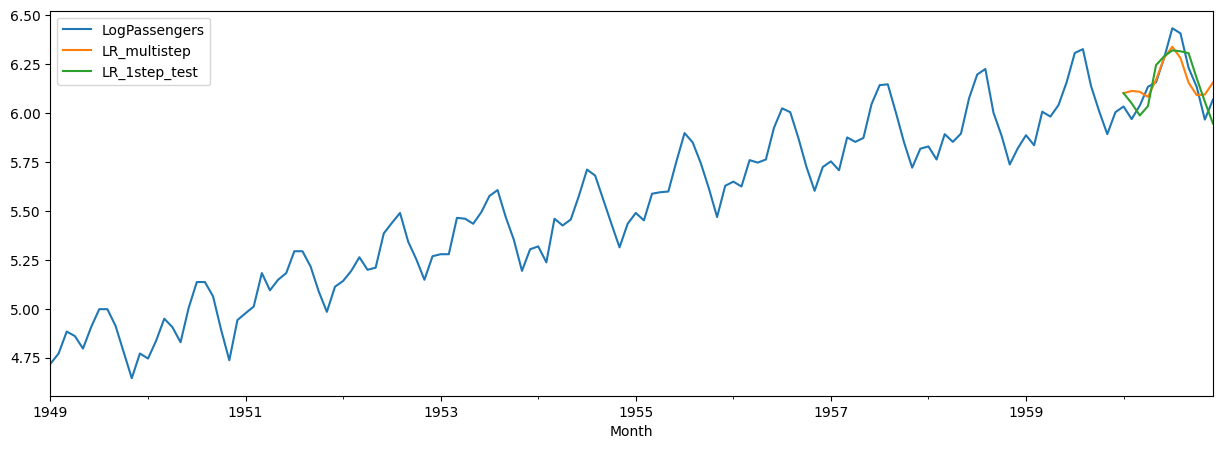

In [44]:
#Plot 1-step and multi-step forecast
df[['LogPassengers','LR_multistep','LR_1step_test']].plot(figsize = (15,5));

In [74]:
#Make multi-output supervised dataset
Tx = T
Ty = NTest
X = []
Y = []

#Series = df['LogPassegers'].to_numpy()
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)


In [75]:
X = np.array(X).reshape(-1,Tx)
Y = np.array(Y).reshape(-1,Ty)

In [76]:
N = len(X)
print("X.shape: ",X.shape,"Y.shape: ",Y.shape)

X.shape:  (123, 10) Y.shape:  (123, 12)


In [77]:
XTrain_m,YTrain_m = X[:-1],Y[:-1]
XTest_m,YTest_m = X[-1:],Y[-1:]

In [78]:
lr = LinearRegression()
lr.fit(XTrain_m,YTrain_m)
lr.score(XTrain_m,YTrain_m)

0.9734607773512526

In [79]:
lr.score(XTest_m,YTest_m)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [72]:
# Example:
# YTest = np.array([[1, 2, 3],
#                   [4, 5, 6]])

# YTest_flattened = YTest.flatten()
# print(YTest_flattened)
# # Output: [1, 2, 3, 4, 5, 6]

In [81]:
r2_score(lr.predict(XTest_m).flatten(),YTest_m.flatten())

0.8018749676715242

In [82]:
df.loc[test_idx,'LR_multioutput'] = lr.predict(XTest_m).flatten()

<Axes: xlabel='Month'>

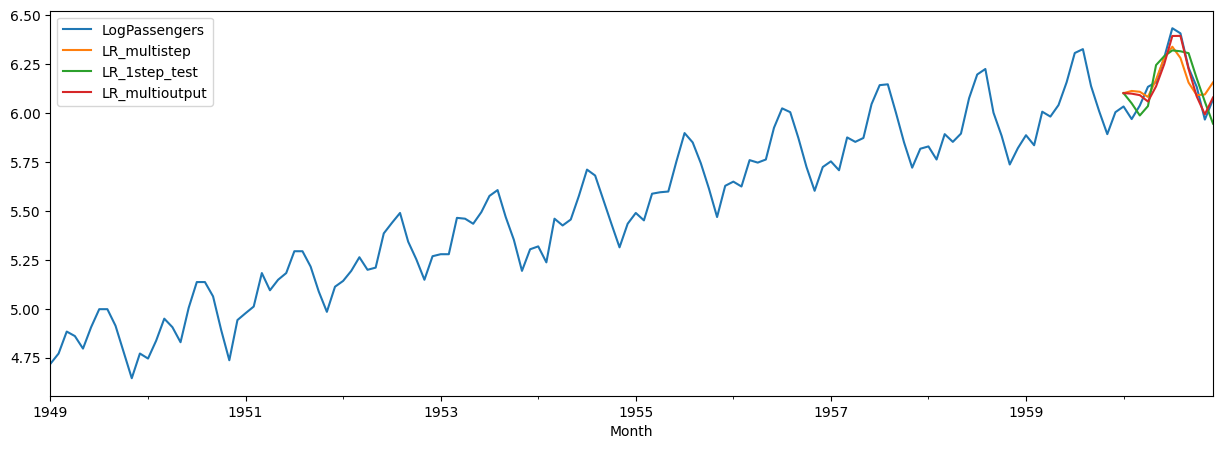

In [83]:
#Plot all forecast
cols = ['LogPassengers','LR_multistep','LR_1step_test','LR_multioutput']
df.[cols].plot(figsize = (15,5))

<Axes: xlabel='Month'>

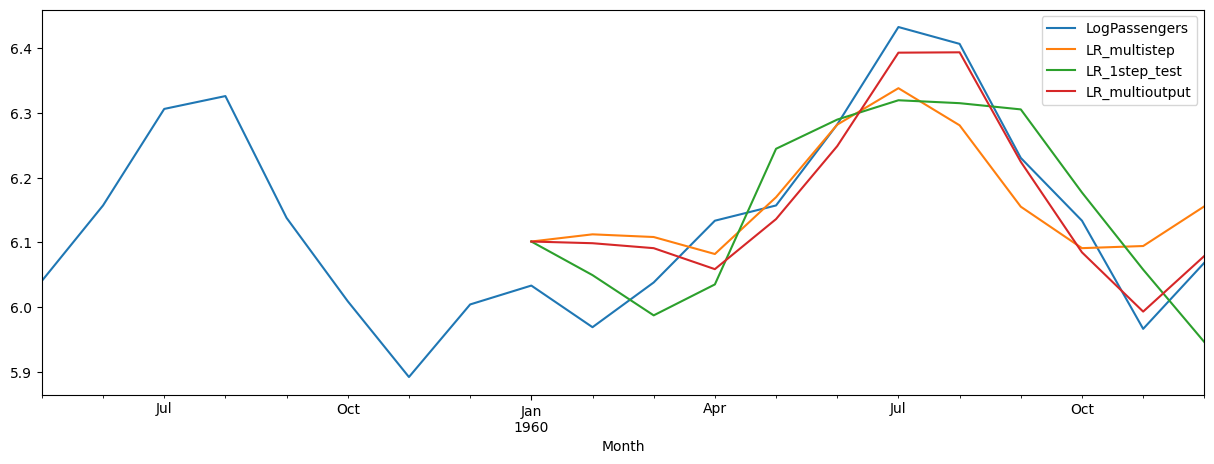

In [85]:
#Plot all forecast
cols = ['LogPassengers','LR_multistep','LR_1step_test','LR_multioutput']
df.iloc[-20:][cols].plot(figsize = (15,5))

In [89]:
#MAPE
mape1 = mean_absolute_percentage_error(YTest,multistep_predictions)
print("multi-step MAPE: ",mape1)

mape2 = mean_absolute_percentage_error(YTest,\
                                       df.loc[test_idx,"LR_multioutput"])
print("multi-output MAPE: ",mape2)

multi-step MAPE:  0.012229325023475304
multi-output MAPE:  0.007178924475039778


# **Test Other Models**

In [94]:
def one_step_and_multistep_forecast(model,name):
  model.fit(XTrain,YTrain)
  print("One-step forecast: ",name)
  print("Train R^2: ",model.score(XTrain,YTrain))
  print("Test  R^2: ",model.score(XTest,YTest))

  #Store 1-step forecast
  df.loc[train_idx,f'{name}_1step_train'] = model.predict(XTrain)
  df.loc[test_idx,f'{name}_1step_test'] = model.predict(XTest)

  #Generate multi-step forecast
  multistep_prediction = []

  #first input
  last_x = XTest[0]

  while len(multistep_prediction) < NTest:
    p = model.predict(last_x.reshape(1,-1))[0]

    #update the prediction list
    multistep_prediction.append(p)

    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

  #Store multi-step forecast
  df.loc[test_idx,f'{name}_multistep_test'] = multistep_prediction

  #MAPE of multi_step_forecast
  mape = mean_absolute_percentage_error(YTest,multistep_prediction)
  print("Test MAPE (multi-step): ",mape)

  #Plot all the forecast
  col = [
      'LogPassengers',
      f'{name}_1step_train',
      f'{name}_1step_test',
      f'{name}_multistep_test',
      ]
  df[col].plot(figsize = (10,5));
  df.iloc[-50:][col].plot(figsize = (10,5));

One-step forecast:  SVR
Train R^2:  0.9620706864124723
Test  R^2:  0.34759277730706106
Test MAPE (multi-step):  0.017529446164230467


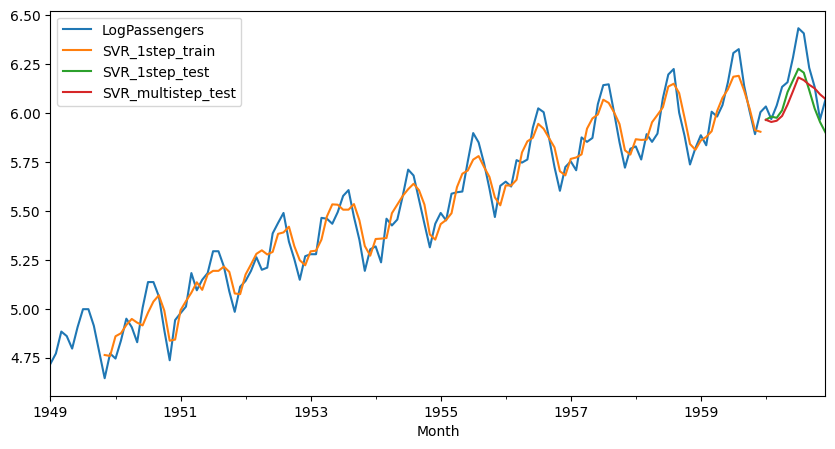

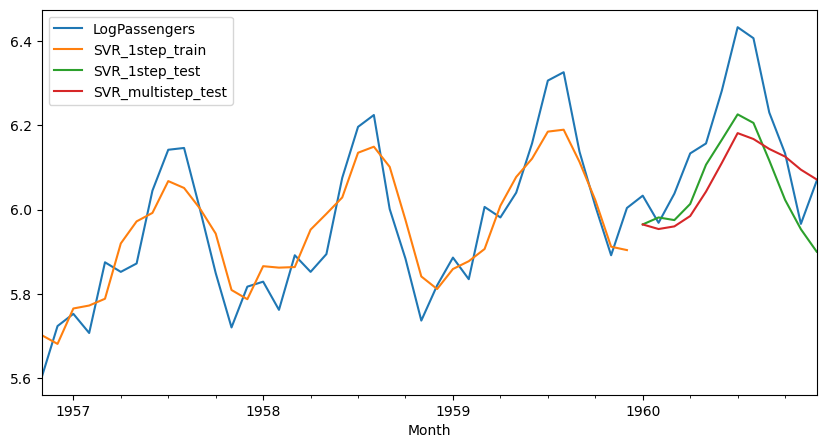

In [95]:
one_step_and_multistep_forecast(SVR(),"SVR")

One-step forecast:  FR
Train R^2:  0.988881063150699
Test  R^2:  0.25840385577670033
Test MAPE (multi-step):  0.028961418682025144


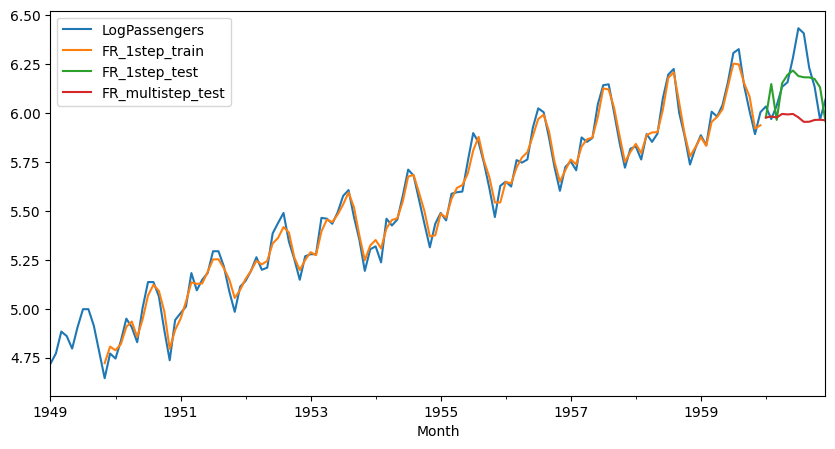

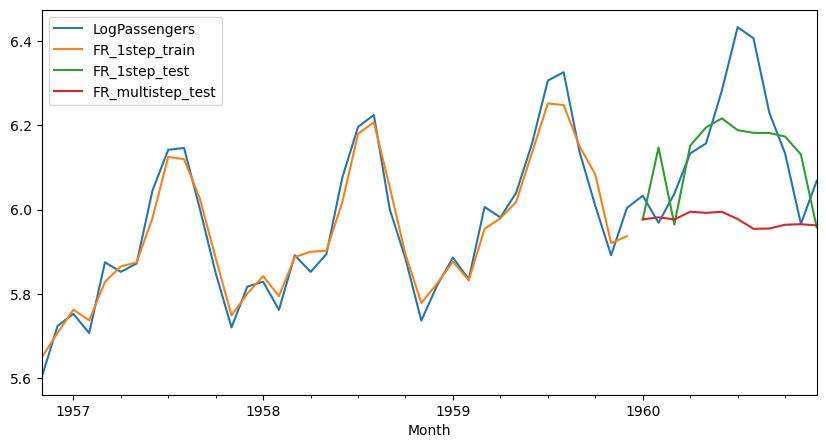

In [96]:
one_step_and_multistep_forecast(RandomForestRegressor(),"FR")

In [99]:
def multi_output_forecast(model,name):
  model.fit(XTrain_m,YTrain_m)

  #save multi-output forecast to dataframe
  df.loc[test_idx,f'{name}_multioutput'] = model.predict(XTest_m).flatten()

  mape = mean_absolute_percentage_error(
      YTest,df.loc[test_idx,f'{name}_multioutput']
  )
  print("Test MAPE (multi-output): ",mape)

  cols = [
      'LogPassengers',
      f'{name}_1step_train',
      f'{name}_1step_test',
      f'{name}_multistep_test',
      f'{name}_multioutput'
  ]
  df[cols].plot(figsize = (15,5))
  df.iloc[-50:][cols].plot(figsize = (15,5));



Test MAPE (multi-output):  0.016964161997235216


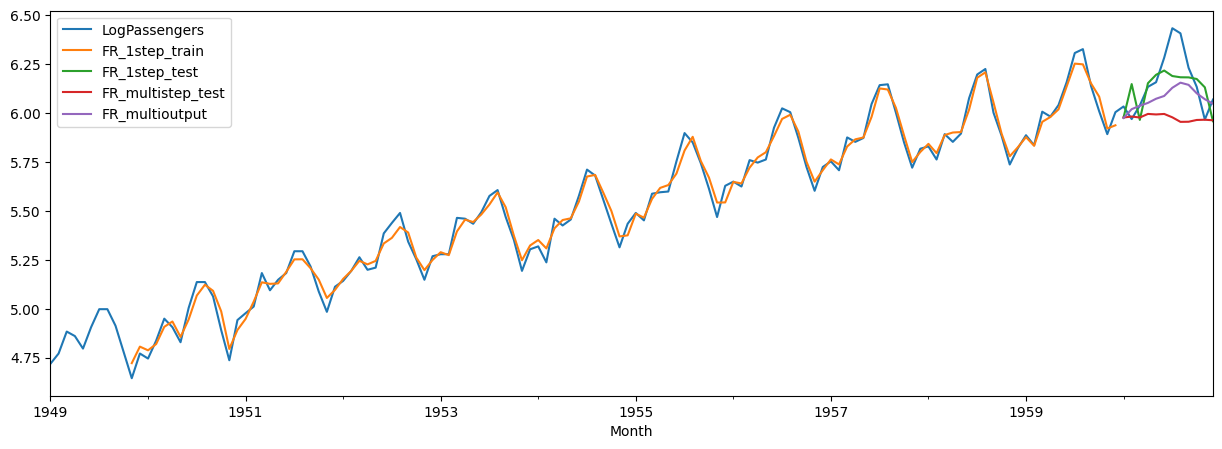

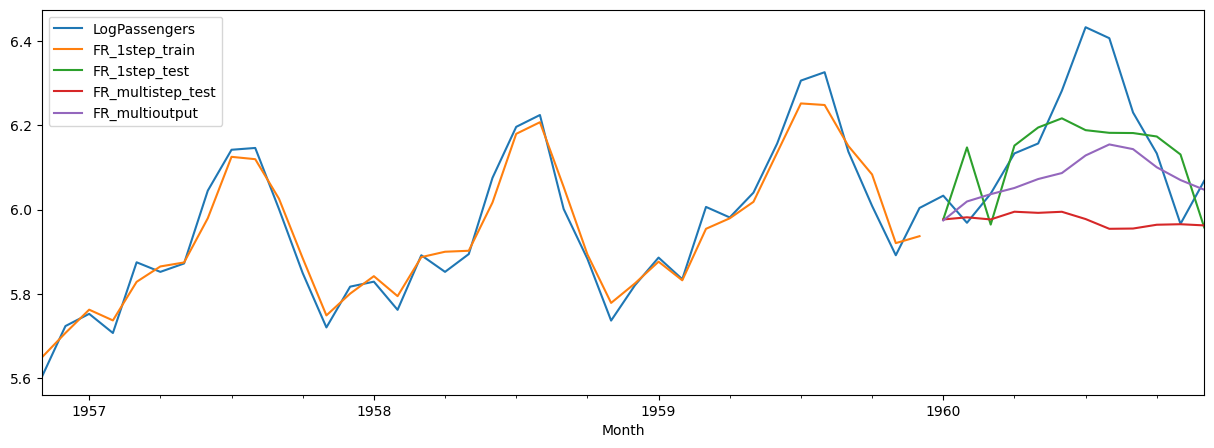

In [100]:
multi_output_forecast(RandomForestRegressor(),'FR')